# Breast Cancer Prediction using Perceptron Model
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemendrarajawat/World-With-Deep-Learning/blob/master/Perceptron%20Model%20-%20Breast%20Cancer%20Prediction.ipynb)

## What is Perceptron Model?
The perceptron model, proposed by Minsky-Papert, is a more general computational model than McCulloch-Pitts neuron. It overcomes some of the limitations of the M-P neuron by introducing the concept of numerical weights (a measure of importance) for inputs, and a mechanism for learning those weights. Inputs are no longer limited to boolean values like in the case of an M-P neuron, it supports real inputs as well which makes it more useful and generalized.

### Mathematical Formula for Perceptron Model:

$y = 1, \mbox{if } \sum_{i=0}^{n}w_i x_i >= b$

$y = 0, \mbox{otherwise}$

## Why use Perceptron Model over MP Neuron Model?
* It allow to use the Real Input instead of forcing to the Boolean Input as in the case of MP Neuron Model.
* It also uses Boolean output data as we do in MP Neuron Model.
* But, As every input is associated with a weight and by tuning the weights we can control the slope of line/plane. The accuracy of Perceptron Model is more.
* In perceptron model we can use basic Learning Model. Not by the Brute-Force search as we do in MP Neuron Model


Let's see Perceptron Model in action.

Visit my GitHub Profile for more cool stuff: [Hemendra Singh Rajawat - GitHub](https://github.com/hemendrarajawat)


## Importing Libaries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns; sns.set()
from tqdm import tqdm_notebook
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

## Load Data

In [0]:
breast_cancer = load_breast_cancer()

In [504]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [505]:
# Now create Pandas DataFrame

df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [506]:
df['target'] = breast_cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [507]:
df.shape

(569, 31)

In [0]:
X = df.drop(columns='target')
Y = df['target']

## Train-Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [510]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


## Convert data into Numpy Array

In [0]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

## Perceptron Class

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y_pred = [self.model(x) for x in X]
    return np.array(Y_pred)
    
  def fit(self, X, Y, epochs=1, initialize=True, learning_rate=1):
    maxAccuracy = 0
    accuracy = {}
    wt_matrix = []
    
    if initialize:
      np.random.seed(0)
      self.w = np.random.random(X.shape[1])
      self.b = np.random.random()
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if (y_pred == 0 and y == 1):
          self.w = self.w + learning_rate * x
          self.b = self.b + learning_rate * 1
        elif (y_pred == 1 and y == 0):
          self.w = self.w - learning_rate * x
          self.b = self.b - learning_rate * 1
          
      accuracy[epoch] = accuracy_score(self.predict(X), Y)
      if accuracy[epoch] > maxAccuracy:
        maxAccuracy = accuracy[epoch]
        w = self.w
        b = self.b
        
      wt_matrix.append(self.w)
    
    maxAccuracyEpoch = max(accuracy, key=accuracy.get)
    self.w = w
    self.b = b
    
    print('Training Completed')
    print('Maximum accuracy:', accuracy[maxAccuracyEpoch] , 'at epoch no:', maxAccuracyEpoch)
    
    plt.plot(accuracy.values())
    plt.title('Accuracy/Epoch Graph')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0,1)
    plt.show()
    
    return np.array(wt_matrix)

## Training the Model


Training Completed
Maximum accuracy: 0.9406593406593406 at epoch no: 3351


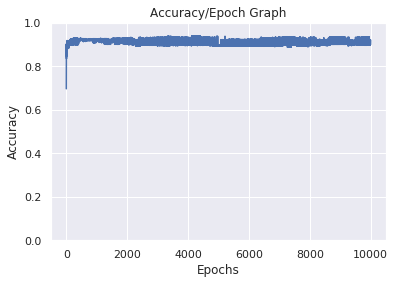

In [513]:
epochs = 10000
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, epochs=epochs, learning_rate=0.1)

In [514]:
wt_matrix.shape

(10000, 30)

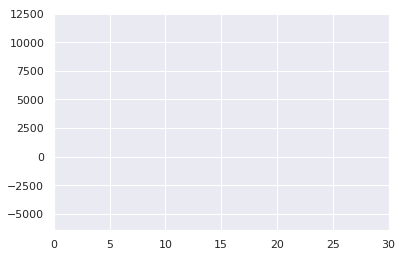

In [515]:
fig, ax = plt.subplots()

ax.set_xlim((0, wt_matrix.shape[1]))
ax.set_ylim((wt_matrix.min(), wt_matrix.max()))

line, = ax.plot([], [], lw=2)

In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=3, blit=True)

In [518]:
HTML(anim.to_html5_video())

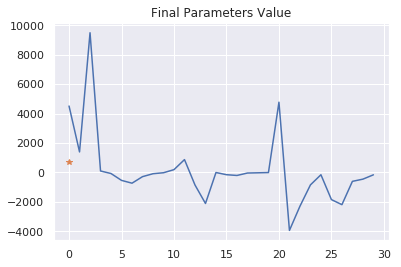

In [519]:
plt.title('Final Parameters Value')
plt.plot(perceptron.w)
plt.plot(perceptron.b, '*')
plt.show()

## Evaluating the Model

In [520]:
print('Training Accuracy', accuracy_score(perceptron.predict(X_train), Y_train))
print('Test Accuracy', accuracy_score(perceptron.predict(X_test), Y_test))

Training Accuracy 0.9406593406593406
Test Accuracy 0.9473684210526315


## Summary

* With the help of Perceptron Model we are able to increase the accuracy comparision to MP Neuron. 
* There are many limitations to Perceptron Model: 
  * Only works for boolean output
  * As sharp threshold is used, the accuracy is decreased
  * The Learning Model is not good
  
We will see more good models in the upcoming modules.
